In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [3]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [4]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [5]:
# Convert date to datetime

df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

# This is the additional data format change code, If only run the above code, getting an error
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], format='%d/%m/%Y', errors='coerce')

# Define the start and end dates
start_date = '2020-01-01'
end_date = '2022-10-31'

# Create a new dataframe by filtering the original dataframe
df_uk_2020_2022 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
df_uk_2020_2022.dtypes

C:\Users\elif.ozkol\AppData\Local\Temp\ipykernel_19532\733495200.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

In [6]:
df_uk_2020_2022.head()

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
364,2020-01-01,21143.49017,16484.53341,0.235526,1.8,4105.135064,7593.671456,102.803139,188.237,-9.0,143.843933,394.481,156.120819,2007.454,3.9,2.9,-2.7,-0.023449
365,2020-02-01,19330.92035,15082.33282,0.205263,1.7,3715.602808,6917.276197,102.654106,188.494,-7.0,145.886368,400.756,158.801712,2045.350,4.1,2.8,-2.7,-0.167942
366,2020-03-01,15101.13333,11804.71828,0.175000,1.5,3150.139383,5889.066472,103.284996,189.074,-34.0,147.904022,408.152,161.890244,2090.455,4.1,2.2,-20.3,0.214355
367,2020-04-01,16454.45843,12892.18801,0.178571,0.8,3302.466764,6168.946944,103.979889,189.179,-33.0,152.680969,423.925,168.403976,2192.415,4.1,0.9,-20.3,-0.115880
368,2020-05-01,17042.95836,13365.07954,0.182143,0.5,3403.981947,6378.388367,103.715004,189.223,-36.0,152.357590,423.720,167.746902,2187.582,4.1,-0.4,-20.3,0.033131


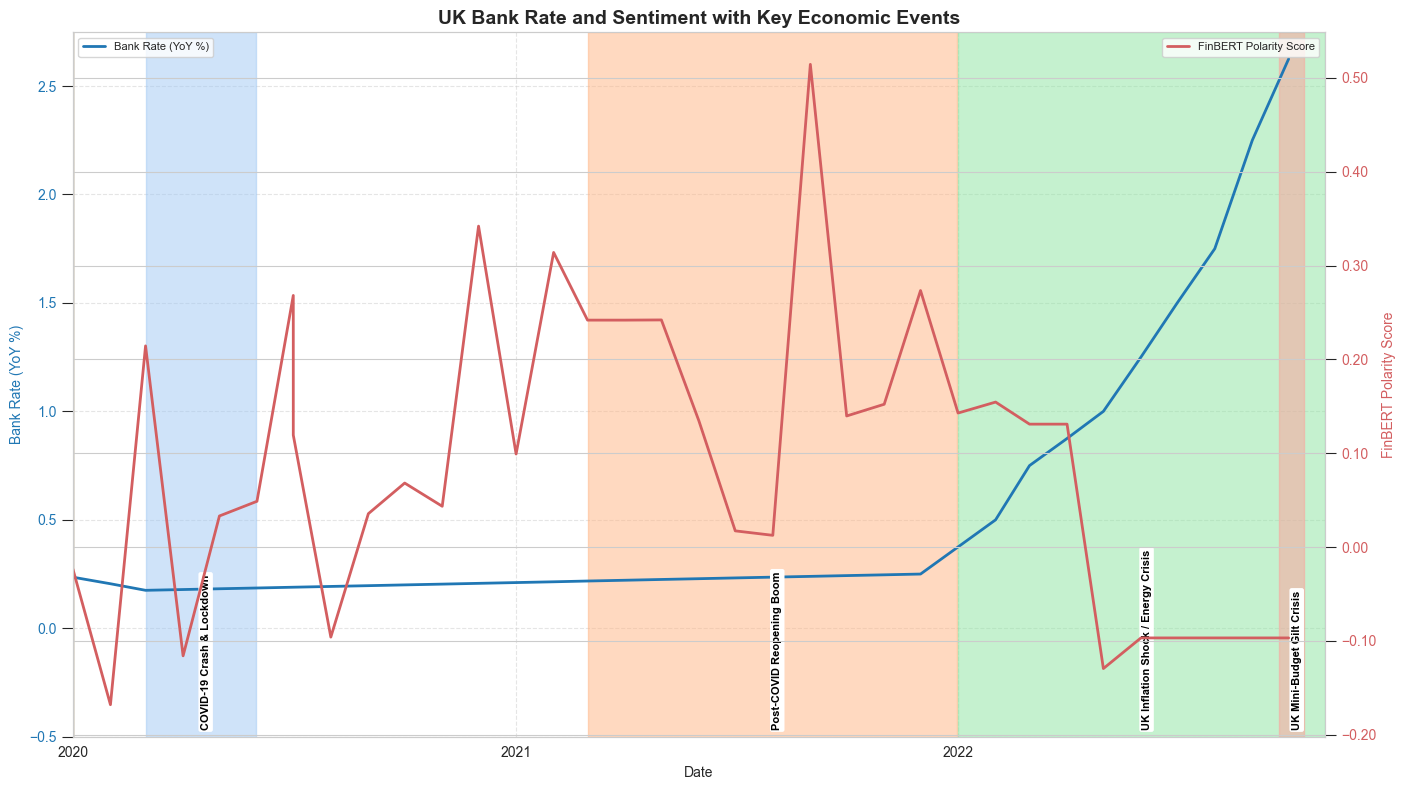

In [7]:
# Filter data from 1 Jan 2020 onwards
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2022-10-31')
df_plot = df_uk_2020_2022[
    (df_uk_2020_2022['Date'] >= start_date) & (df_uk_2020_2022['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['base_rate', 'polarity_score_finbert'])

# Define the key economic events dictionary
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Apply a Seaborn style
sns.set_style('whitegrid')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- CPI Plot ---
color_base_rate = '#2077b4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Bank Rate (YoY %)', color=color_base_rate, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['base_rate'], color=color_base_rate, label='Bank Rate (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_base_rate, size=8)

# --- Sentiment Score Plot ---
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- Event Shading and Labels ---
# Use a Seaborn palette for event colors
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

# Set the y position for the labels to be at the bottom of the chart (y=0)
event_y_position = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    # Skip events that start after the chart's end date
    if start > end_date:
        continue

    # Limit shaded region to chart range
    display_start = max(start, start_date)
    display_end = min(end, end_date)

    ax1.axvspan(display_start, display_end, color=event_colors[i % len(event_colors)], alpha=0.5)

    # Only add label if within visible range
    label_x_pos = display_start + (display_end - display_start) / 2
    if start_date <= label_x_pos <= end_date:
        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'))

    i += 1

# --- Title and Layout ---
plt.title('UK Bank Rate and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Legends ---
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, end_date)
ax1.set_ylim(bottom=-0.5)  # Ensure the y-axis starts at 0

plt.show()

### Visual analysis shows that Bank Rate Y-o-Y percentage change tends to move inversely to the finBERT sentiment scores. Also significant movements in both CPI and sentiment scores tend to take place where there are key economic events which directly impact on the UK economy (e.g. the Global Financial Crisis, Eurozone Debt Crisis, Brexit and Covid-19.

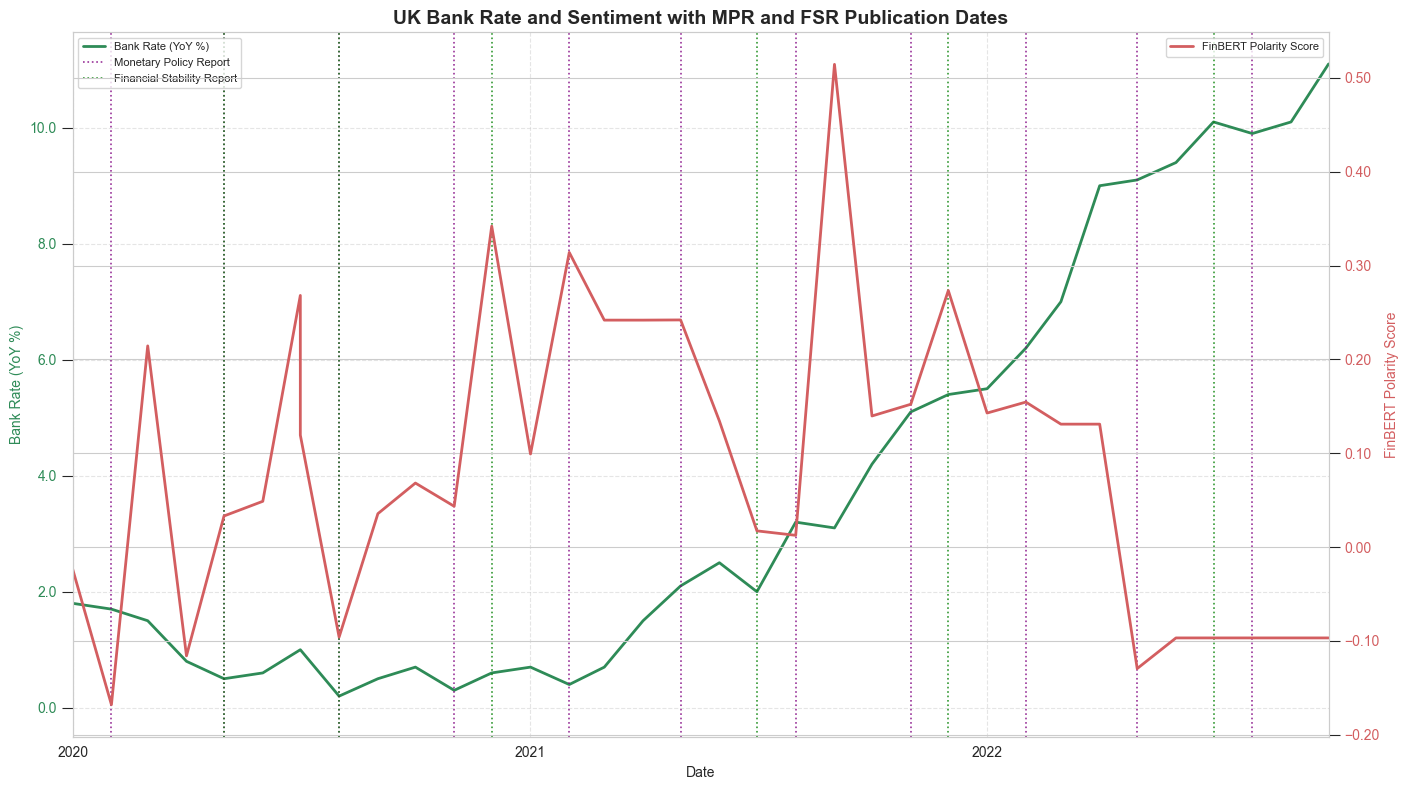

In [8]:
start_date = pd.to_datetime('2020-01-01')
df_plot2 = df_uk_2020_2022[df_uk_2020_2022['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['base_rate', 'polarity_score_finbert'])

# --- Load Publication Dates from repo ---
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# --- Apply Style ---
sns.set_style('whitegrid')

# --- Plot Setup ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bank Rate Line (Left Axis)
color_bank_rate = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Bank Rate (YoY %)', color=color_bank_rate, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['CPI'], color=color_bank_rate, label='Bank Rate (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_bank_rate, size=8)

# Sentiment Line (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- NEW: Add MPR and FSR Vertical Lines ---

# MPR: Purple Dotted Lines
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# FSR: Green Dotted Lines
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# --- Title and Layout ---
plt.title('UK Bank Rate and Sentiment with MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Deduplicated Legend ---
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

# --- Legend for FinBERT on Right Axis ---
handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(bottom=-0.5)

plt.show()

* Rising rates reflect central bank attempts to cool inflation, especially post-2021.

* Sentiment diverges from rate trends: despite higher rates, sentiment falls sharply, suggesting market anxiety or distrust.

* Publication dates (MPR & FSR) often cluster around inflection points, reinforcing their role as catalysts or reflections of broader economic conditions.

### Drop unncessary columns to reduce the number of variables to be explored

In [9]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_2020_2022.drop(['ftse_250_price', 'ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

### Rename columns

In [10]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [11]:
# Define the new order of the columns
new_column_order = [
    'Date', 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,BoE_base_rate,finbert_sentiment_score,confidence_score,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,CPI_pct_change,0-2yr_gilts_TReturns
364,2020-01-01,0.235526,-0.023449,-9.0,3.9,2.9,-2.7,16484.53341,1.8,188.237
365,2020-02-01,0.205263,-0.167942,-7.0,4.1,2.8,-2.7,15082.33282,1.7,188.494
366,2020-03-01,0.175000,0.214355,-34.0,4.1,2.2,-20.3,11804.71828,1.5,189.074
367,2020-04-01,0.178571,-0.115880,-33.0,4.1,0.9,-20.3,12892.18801,0.8,189.179
368,2020-05-01,0.182143,0.033131,-36.0,4.1,-0.4,-20.3,13365.07954,0.5,189.223


# Correlation analysis

### Create pairplot for visual correlation analysis

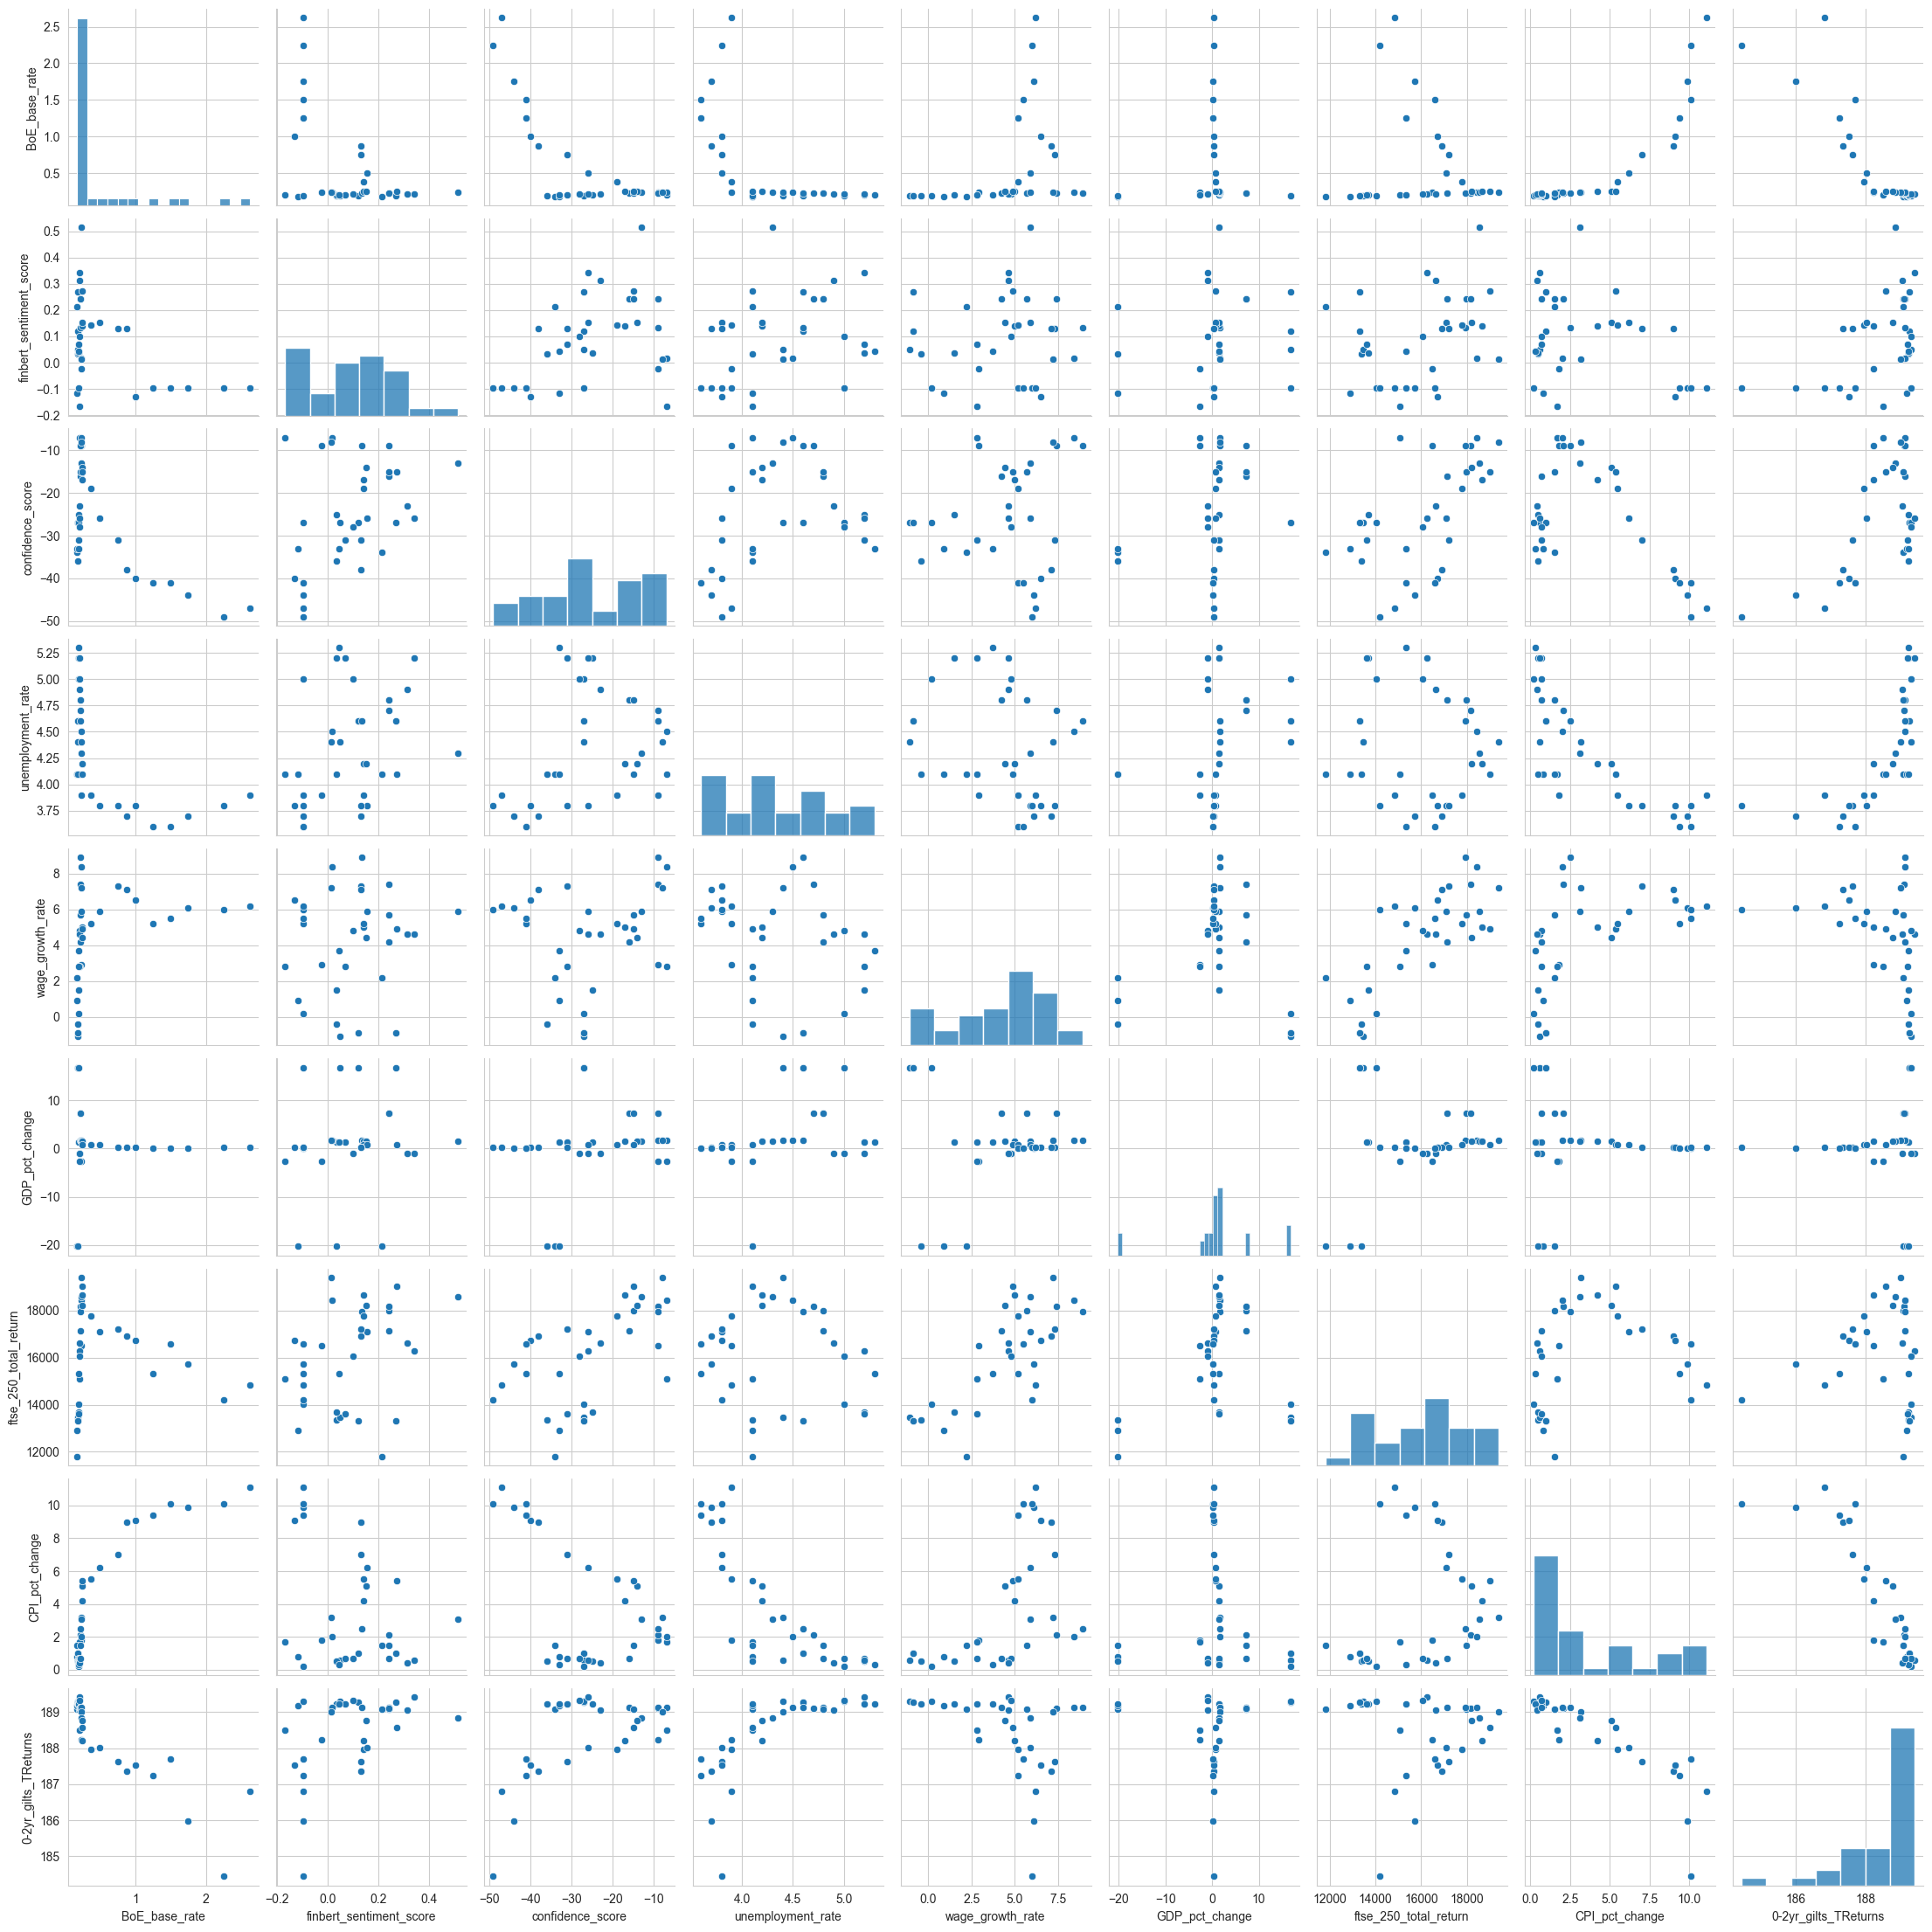

In [12]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

### Create correlation matrices

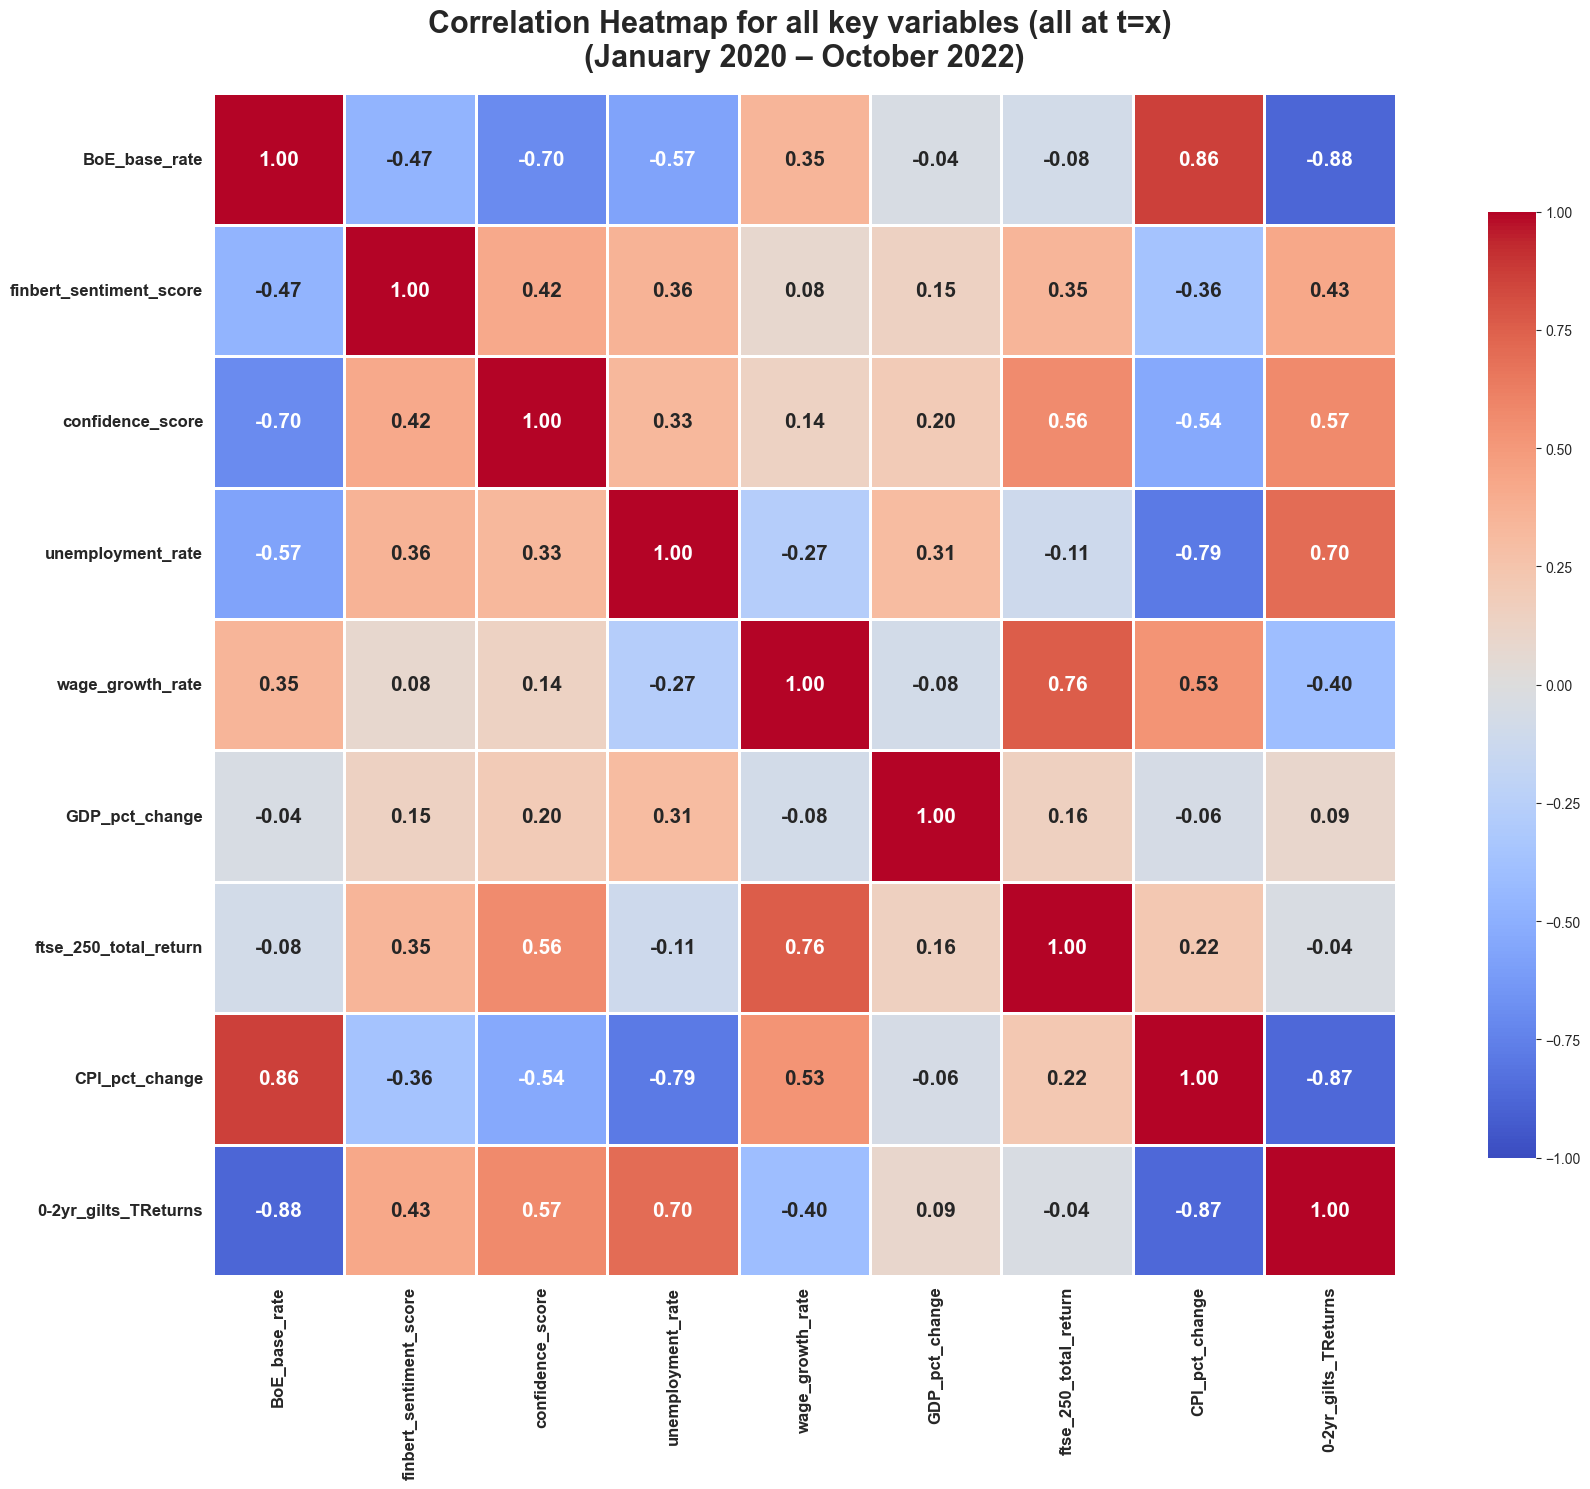

In [13]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for all key variables (all at t=x) \n(January 2020 – October 2022)', 
          fontsize=22, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

### Top features to keep in short-term predictive models:

- CPI_pct_change

- 0-2yr_gilts_TRReturns

- confidence_score

### Consider dropping:

- GDP_pct_change
- ftse_250_total_return (unless you're modeling longer-term trends)

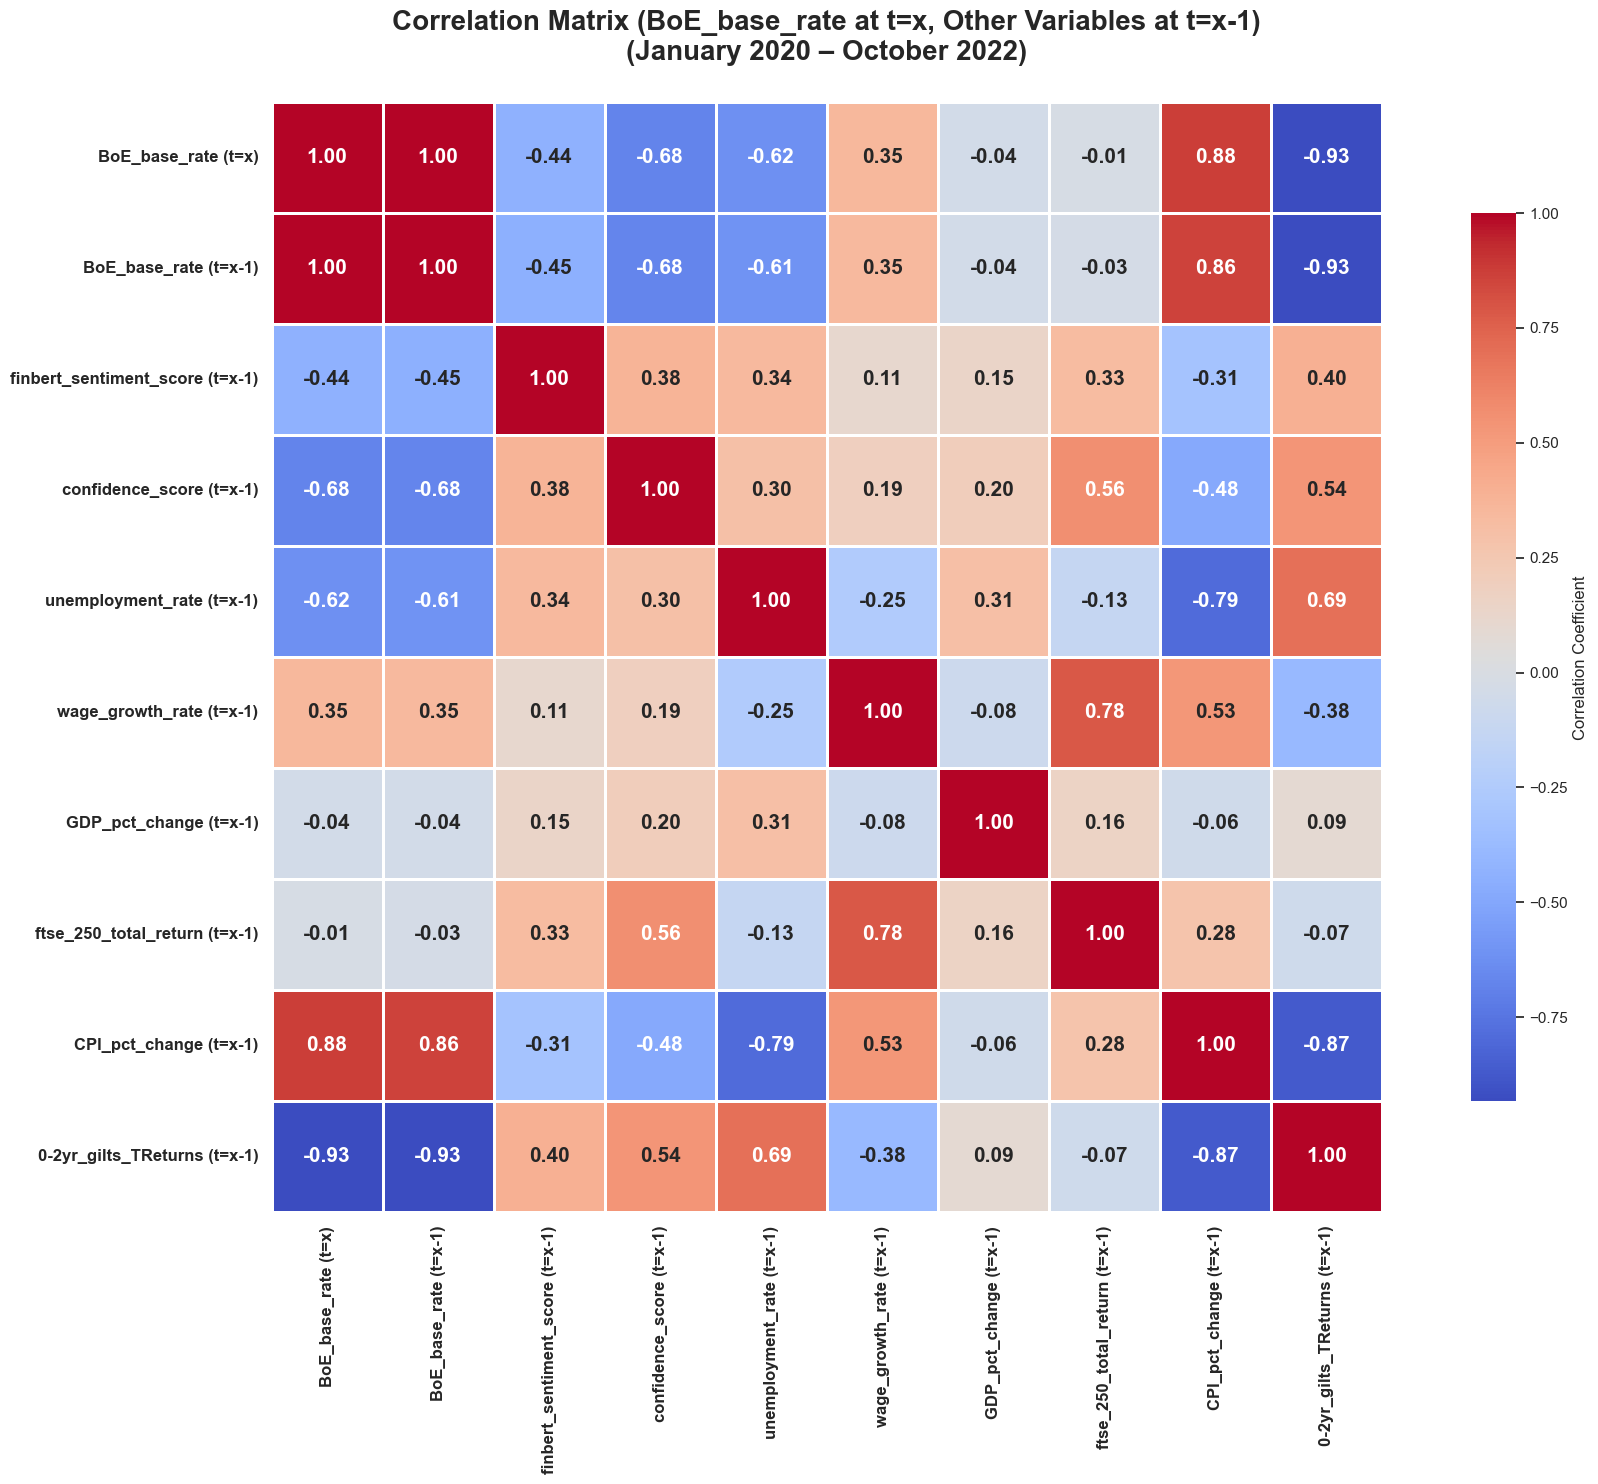

In [14]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+1 (1 month lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate at t=x, Other Variables at t=x-1)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

### Key Correlations with BoE_base_rate (t=x):

- 0-2yr_gilts_TRReturns	-0.93	Very strong negative correlation – indicates market expectations are highly predictive of BoE rate moves.
- CPI_pct_change	0.88	Very strong positive correlation – shows inflation drives rate hikes.
- confidence_score	-0.68	Strong negative – possibly reflecting sentiment drop amid monetary tightening.
- unemployment_rate	-0.61	Strong negative – suggests BoE tightens policy when unemployment is low.
- wage_growth_rate	0.35	Weak/moderate positive – still a useful signal, but less direct.
- finbert_sentiment_score	-0.45	Moderate negative – media tone reflects economic pressure.
- ftse_250_total_return	-0.03	No meaningful relationship.
- GDP_pct_change	-0.04	Virtually no contemporaneous signal.

### Summary:
### The top two indicators are:
- 0-2yr_gilts_TRReturns (t=x-1)
- CPI_pct_change (t=x-1)

These are highly predictive of interest rate changes and align with expectations from both economics and machine learning models (as you observed in your XGBoost feature importance).
confidence_score and unemployment_rate also provide strong complementary signals.

### Suggested Features for Modeling:

For your regression or ML models, consider prioritizing:

- 0-2yr_gilts_TRReturns (t=x-1) ✅

- CPI_pct_change (t=x-1) ✅

- confidence_score (t=x-1) ✅

- unemployment_rate (t=x-1) ✅

### Optional additions if not collinear:

- wage_growth_rate (t=x-1)

- finbert_sentiment_score (t=x-1)

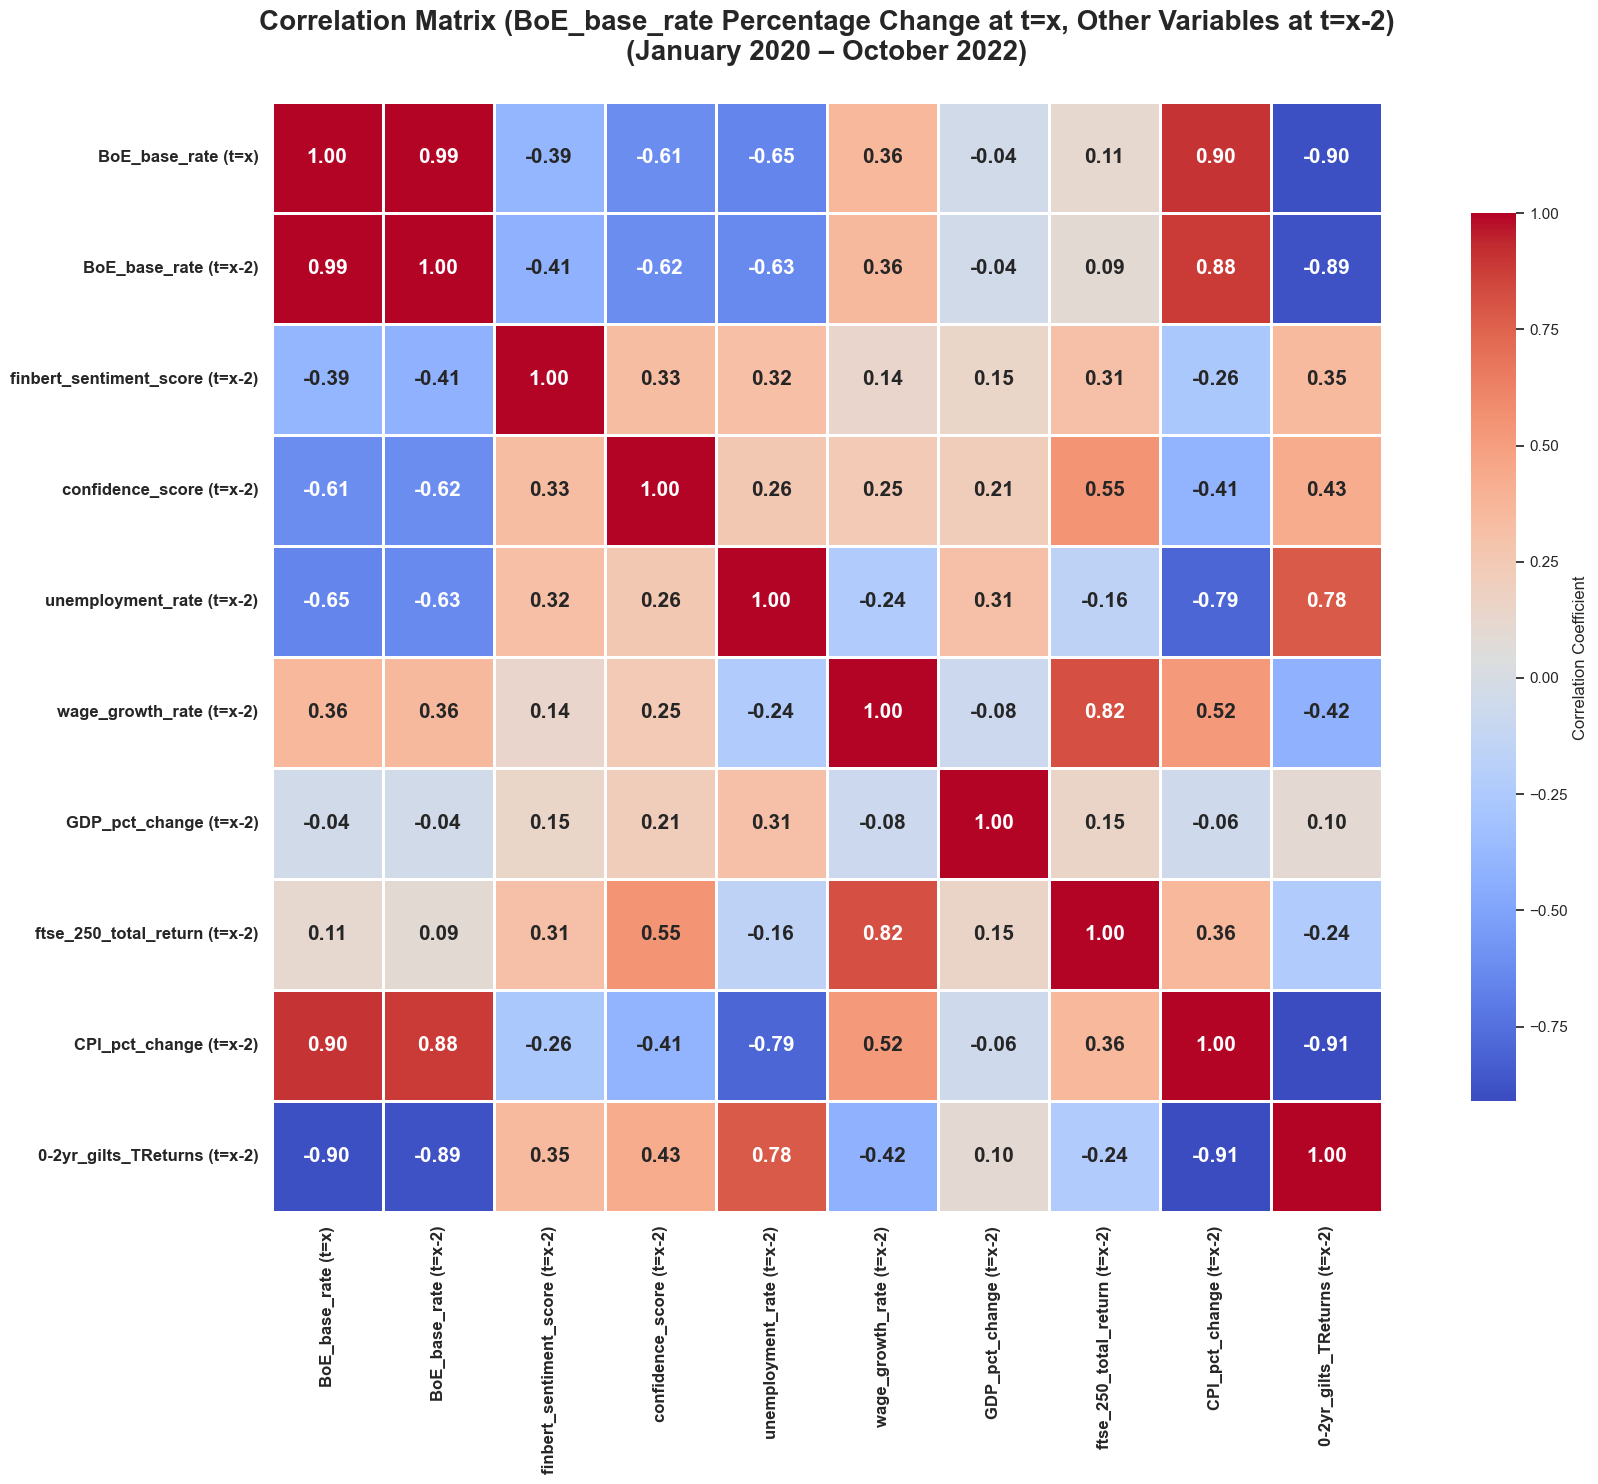

In [15]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+2 (2 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-2)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

### Top correlations with BoE_base_rate (t=x):

- ### CPI_pct_change	+0.90	Strongest positive correlation → inflation two periods earlier is a key driver of BoE rate increases.
- ### 0-2yr_gilts_TRReturns	-0.90	Strong negative correlation → bond yields remain the best signal for rate expectations.
- ### unemployment_rate	-0.65	Strong negative relationship → low unemployment predicts higher rates.
- ### confidence_score	-0.61	Strong inverse → economic pessimism leads to lower rate expectations.
- ### wage_growth_rate	+0.36	Moderate positive correlation.
- ### ftse_250_total_return	+0.11	Weak relationship.
- ### GDP_pct_change	-0.04	Negligible.

### Recommended Features for Regression (from t=x−2 lag):
These are both predictively strong and relatively non-redundant:

### Primary picks:

- CPI_pct_change (t=x-2)

- 0-2yr_gilts_TRReturns (t=x-2)

- unemployment_rate (t=x-2)

- confidence_score (t=x-2)

### Optional (check for multicollinearity):
- wage_growth_rate (t=x-2) – correlated with CPI (0.52), but still acceptable if VIF < 5.

### ❗️Avoid:
Using both t−1 and t−2 lags simultaneously for the same variable unless justified by the model performance and VIF checks.

Features with low correlation to target (e.g. GDP, FTSE) unless you have economic rationale.

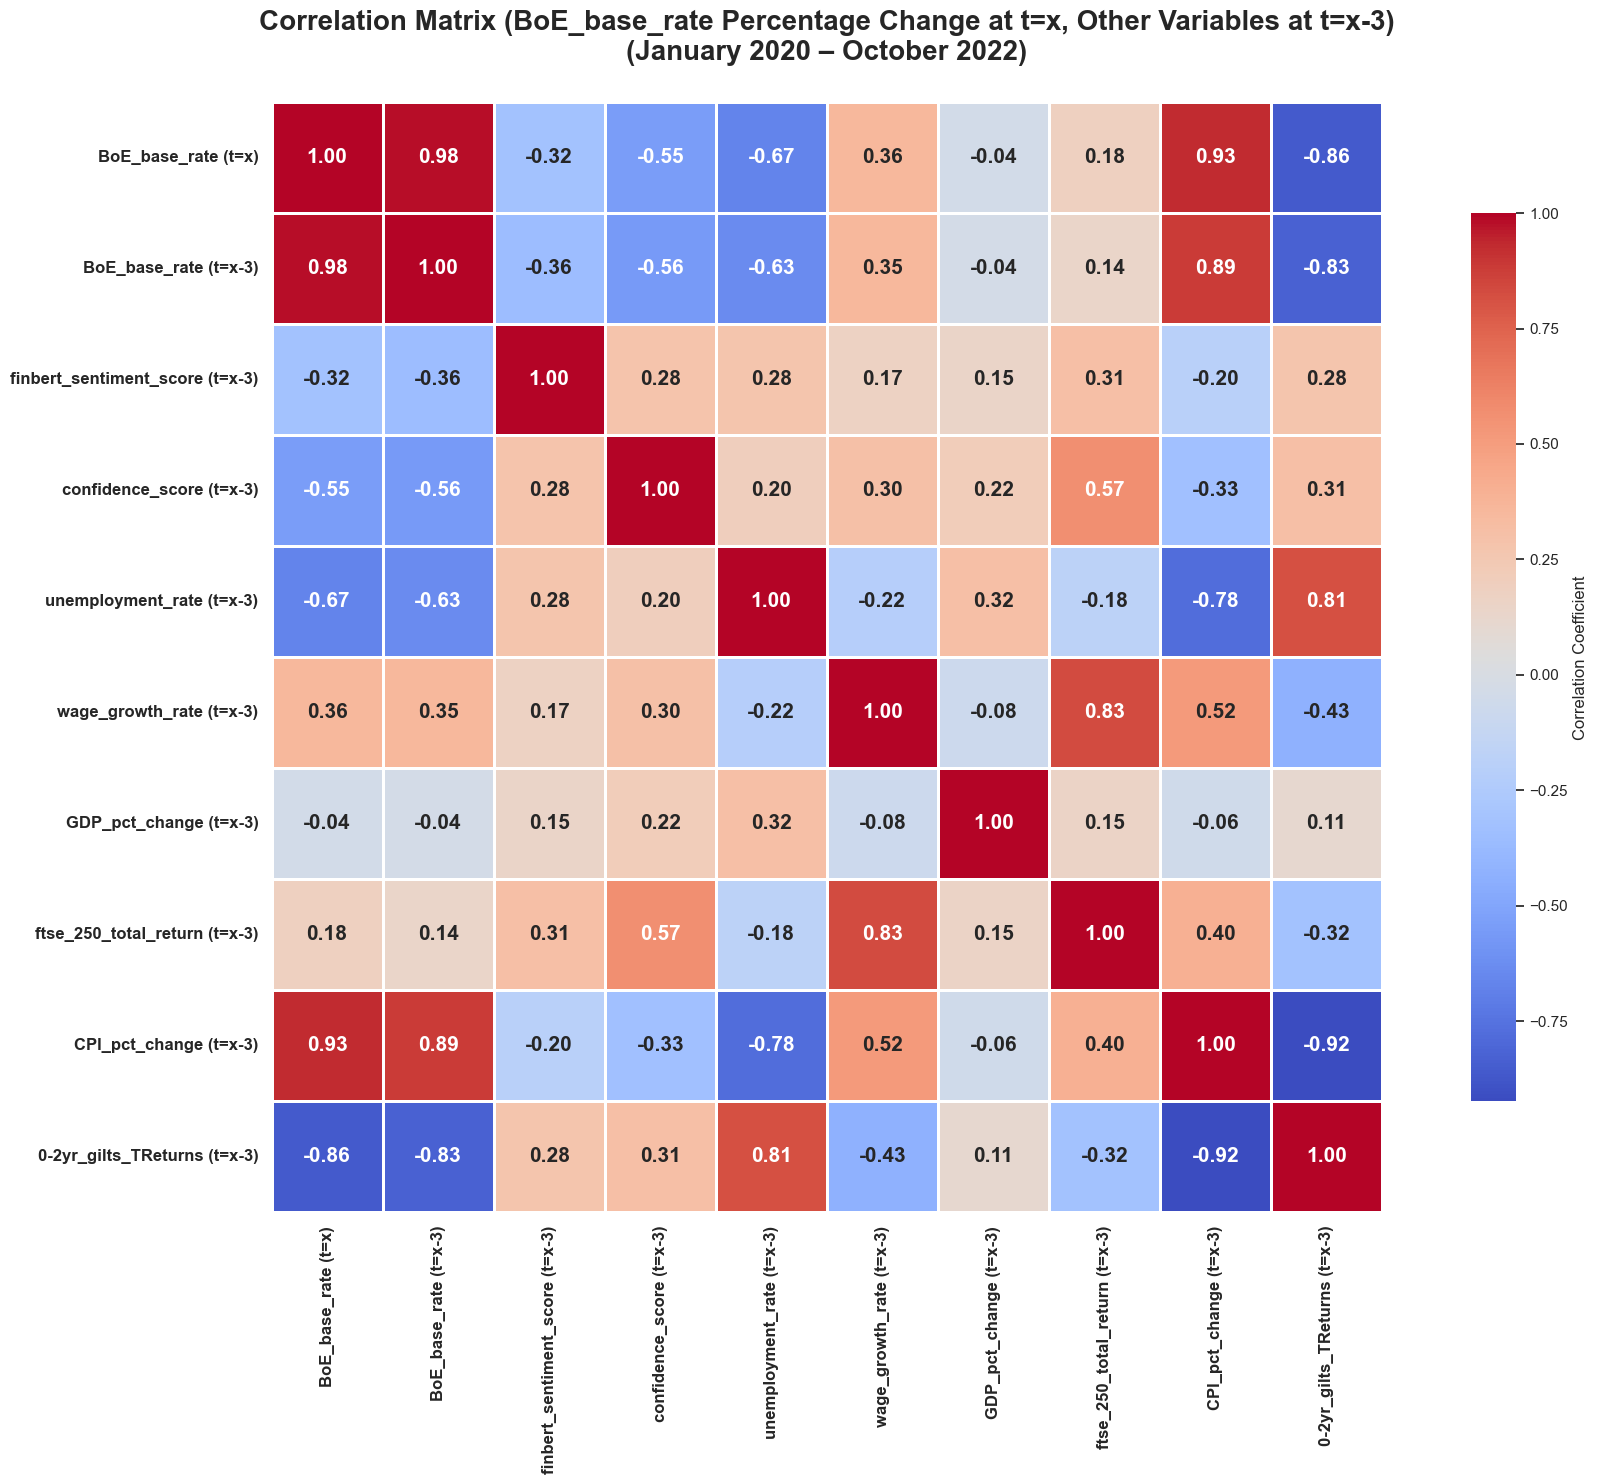

In [16]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+3 (3 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-3)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


### Key Insights:
### Best Predictors from t=x−3:
Prioritize predictive strength and check for low multicollinearity later:

### Strong predictors:
- CPI_pct_change (t=x-3)

- 0-2yr_gilts_TRReturns (t=x-3)

- unemployment_rate (t=x-3)

### Secondary predictors (add if justified):
- wage_growth_rate (t=x-3)

- confidence_score (t=x-3)

###  Low-value features (can be dropped):
- GDP_pct_change (t=x-3)

- finbert_sentiment_score (t=x-3)

- ftse_250_total_return (t=x-3) – despite moderate correlation, it's often market-driven noise.

### Interpretation:
Economic indicators like CPI and gilt returns continue to be excellent predictors of BoE interest rate decisions even with a 3-period lag, reflecting policy reaction time. However, multicollinearity is likely between:

- CPI_pct_change and wage_growth_rate

- CPI_pct_change and 0-2yr_gilts_TRReturns



# Multiple linear regression: Bank Rate vs BoE_base_rate (t=x-1),CPI_pct_change (t=x-3), 0-2yr_gilts_TReturns (t=x-3),unemployment_rate (t=x-2), wage_growth_rate (t=x-2)

### Prepare regression dataframe

In [17]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']  
regression_df['BoE_base_rate (t=x)'] = filtered_df['BoE_base_rate']
regression_df['BoE_base_rate (t=x-1)'] = filtered_df['BoE_base_rate'].shift(1)
regression_df['CPI_pct_change (t=x-3)'] = filtered_df['CPI_pct_change'].shift(3)
regression_df['0-2yr_gilts_TReturns (t=x-3)'] = filtered_df['0-2yr_gilts_TReturns'].shift(3)
regression_df['unemployment_rate (t=x-2)'] = filtered_df['unemployment_rate'].shift(2)
regression_df['wage_growth_rate (t=x-2)'] = filtered_df['wage_growth_rate'].shift(2)


# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation or run regression
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,BoE_base_rate (t=x),BoE_base_rate (t=x-1),CPI_pct_change (t=x-3),0-2yr_gilts_TReturns (t=x-3),unemployment_rate (t=x-2),wage_growth_rate (t=x-2)
BoE_base_rate (t=x),1.000000,0.996721,0.927847,-0.856706,-0.683884,0.354488
BoE_base_rate (t=x-1),0.996721,1.000000,0.914156,-0.841002,-0.666651,0.353291
CPI_pct_change (t=x-3),0.927847,0.914156,1.000000,-0.924124,-0.824107,0.472849
0-2yr_gilts_TReturns (t=x-3),-0.856706,-0.841002,-0.924124,1.000000,0.829352,-0.384910
unemployment_rate (t=x-2),-0.683884,-0.666651,-0.824107,0.829352,1.000000,-0.255124
wage_growth_rate (t=x-2),0.354488,0.353291,0.472849,-0.384910,-0.255124,1.000000


In [18]:
# Define the dependent variable
y = regression_df['BoE_base_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['BoE_base_rate (t=x-1)', 'CPI_pct_change (t=x-3)', '0-2yr_gilts_TReturns (t=x-3)', 'unemployment_rate (t=x-2)','wage_growth_rate (t=x-2)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [19]:
# Call the predictions for X (array).
mlr.predict(X)

array([0.1993616 , 0.19773472, 0.1896809 , 0.17770784, 0.18621732,
       0.1933863 , 0.20968464, 0.22204371, 0.20231391, 0.20941811,
       0.21842313, 0.20232458, 0.20250713, 0.20893866, 0.20816598,
       0.21140773, 0.227189  , 0.23646731, 0.25009987, 0.24237029,
       0.28674332, 0.29262899, 0.34539658, 0.48783306, 0.62733766,
       0.90642578, 1.05289933, 1.2173237 , 1.55748897, 1.82590044,
       2.10930758, 2.65955757])

In [20]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.9955684106967623
Intercept:  4.009074922777832
Coefficients:


[('BoE_base_rate (t=x-1)', np.float64(1.079192637828237)),
 ('CPI_pct_change (t=x-3)', np.float64(0.028944096457372694)),
 ('0-2yr_gilts_TReturns (t=x-3)', np.float64(-0.022216443676353947)),
 ('unemployment_rate (t=x-2)', np.float64(0.03557532081128338)),
 ('wage_growth_rate (t=x-2)', np.float64(-0.005204827786453597))]

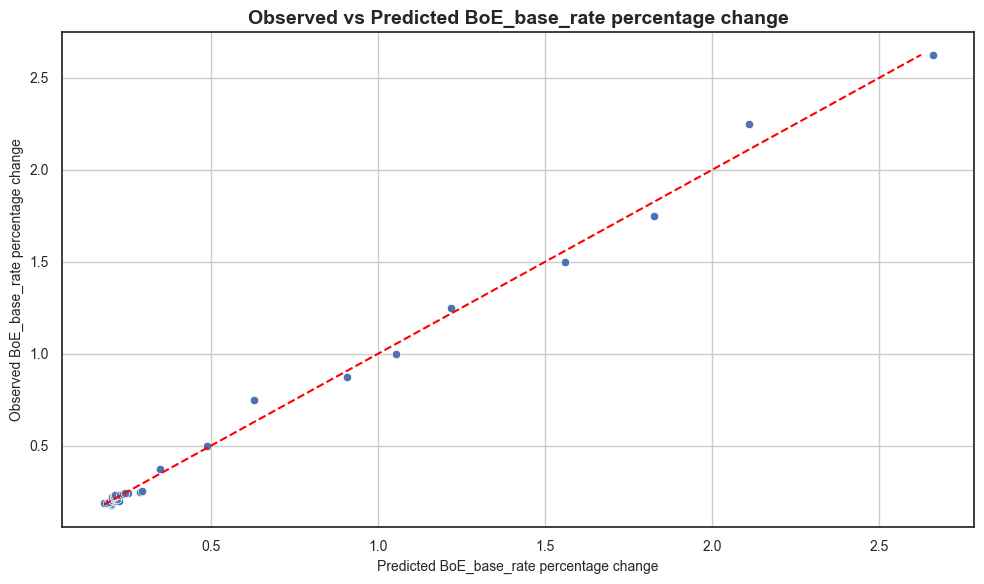

In [26]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['BoE_base_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted BoE_base_rate percentage change', fontsize=10)
plt.ylabel('Observed BoE_base_rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted BoE_base_rate percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

#### This plot indicates a very strong predictive model for BoE base rate percentage changes:

Accurate across full range

Low bias and variance

Highly usable for forecasting or policy scenario analysis
 


### Training and testing subsets with MLR

In [27]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [28]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                            
Dep. Variable:     BoE_base_rate (t=x)   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                     2579.
Date:                 Thu, 22 May 2025   Prob (F-statistic):           3.27e-26
Time:                         17:15:07   Log-Likelihood:                 60.329
No. Observations:                   25   AIC:                            -108.7
Df Residuals:                       19   BIC:                            -101.3
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

### <span style="color: orange;"> R-squared: 0.999, Adjusted R-squared: 0.998

### <span style="color: orange;">Implies the model explains almost all of the variance in the target variable.

### <span style="color: orange;">Such a high R² is rare and may indicate overfitting, especially with only 25 observations.

### <span style="color: orange;">F-statistic: 2579, Prob (F-statistic): 3.27e-26

### <span style="color: orange;">Extremely strong overall model significance.

### <span style="color: orange;">Durbin-Watson: 2.218

### <span style="color: orange;">Close to 2, suggesting no autocorrelation in residuals.

### <span style="color: orange;"> Coefficient Table Highlights
### <span style="color: orange;">Variable	Coef	P-value	Significant?	Interpretation
### <span style="color: orange;">BoE_base_rate (t=x-1)	1.081	0.000	 Yes	Strong, highly significant predictor.
### <span style="color: orange;">CPI_pct_change (t=x-3)	0.0239	0.004	 Yes	Positive, significant lag effect of inflation.
### <span style="color: orange;">0-2yr_gilts_TRReturns (t=x-3)	-0.0271	0.189	 No	Not statistically significant.
### <span style="color: orange;">unemployment_rate (t=x-2)	0.0837	0.079	 Borderline	Mildly positive influence; consider retaining for policy context.
### <span style="color: orange;">wage_growth_rate (t=x-2)	-0.0044	0.073	 Borderline	Weak negative influence; marginally significant.

In [29]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [30]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [0.88892586 0.20479515 0.19702072 0.1834424  0.22772082 0.19048689
 0.21074872 0.2075082  0.46810834 0.19416525 0.18324796 1.03278769
 0.17325851 0.28285889 1.19481405 0.33272726 0.2454662  2.62149576
 0.27664073 0.21943464 0.2212301  0.21208769 1.52629615 0.23904549
 0.20497225]


In [31]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [1.79193136 0.21467104 0.60685725 0.23472654 0.20518936 0.21210342
 2.07573729]


In [32]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

98.78802163525859


### <span style="color: orange;"> R-square of 98.78% when the multiple linear regression model based on the training data set is applied to the testing data set. Great, but potential issues with multicollinearity remain

### Check for multicollinearity

In [33]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                      features
0    566320.1                         const
1         6.2         BoE_base_rate (t=x-1)
2        16.2        CPI_pct_change (t=x-3)
3         5.9  0-2yr_gilts_TReturns (t=x-3)
4         3.8     unemployment_rate (t=x-2)
5         1.8      wage_growth_rate (t=x-2)


### <span style="color: orange;"> Observations from the VIF output:
- BoE_base_rate (t=x-1)	6.2	 Moderate multicollinearity
- CPI_pct_change (t=x-3)	16.2	 Severe multicollinearity
- 0-2yr_gilts_TRReturns (t=x-3)	5.9	 Moderate
- unemployment_rate (t=x-2)	3.8	Acceptable, but not ideal
- wage_growth_rate (t=x-2)	1.8	 No concern

 Interpretation
A VIF > 10 is a strong indicator of multicollinearity.

CPI_pct_change (t=x-3) is highly correlated with one or more other predictors — potentially with BoE_base_rate or gilts returns, both of which are interest/inflation-sensitive.

 Recommendations
Remove or combine highly collinear features:

### Consider dropping CPI_pct_change (t=x-3) or testing alternative lags.

You could also combine CPI and wage growth into an index if economically justified.

### Check for heteroscedasticity

In [34]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [35]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': np.float64(12.26085052406355), 'LM Test p-value': np.float64(0.03138316551936893), 'F-stat': np.float64(3.6573267375070646), 'F-test p-value': np.float64(0.017377857036215163)}


### LM Test p-value	0.0314	 Significant — reject null of homoskedasticity
### F-test p-value	0.0174	 Also significant — confirms above

### Both p-values are below 0.05, which means:

### There is statistically significant evidence of heteroskedasticity.

### Check normality of regression residuals - assumption of MLR

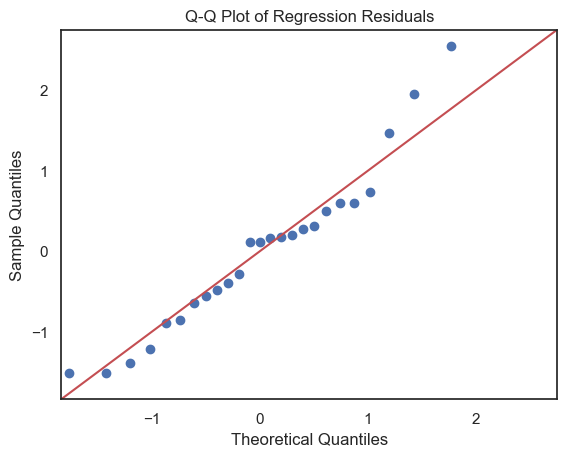

In [36]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

### Normality is mostly satisfied, with only minor deviation in the tails.

This is not a major concern, particularly if:

You are using robust standard errors (as suggested earlier).

You're primarily focused on prediction rather than inference.


## Evaluate the model

In [37]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 0.054400493922504504
Mean Square Error (Final): 0.007548142951435193


### <span style="color: orange;">  On average, the model's predictions for CPI percentage change deviate from the actual values by about 0.0544 percent (MAE). On the other hand, the average of the squared prediction errors is approximately 0.0075 percent (MSE).

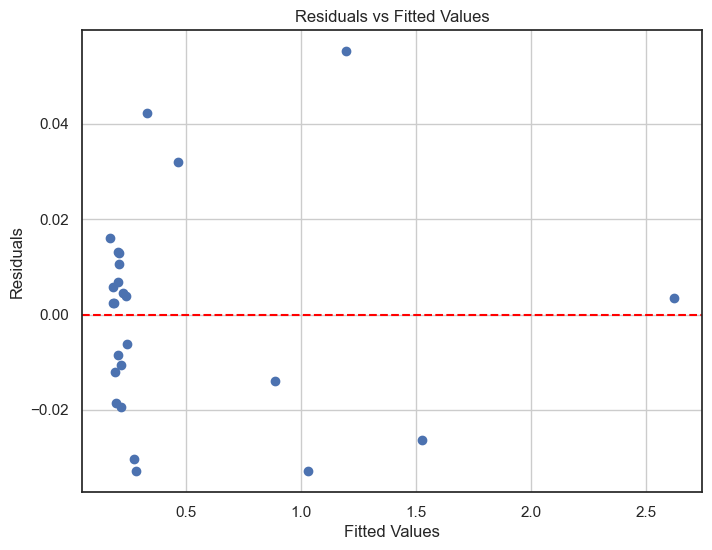

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

### Interpretation
Fan/triangle shape: The residuals are clustered tightly at lower fitted values and become more spread out as fitted values increase.

This is a classic sign of heteroskedasticity — variance is not constant across the range of predictions.

No clear non-linear trend (e.g., curve): Suggests linearity is likely acceptable.

Residuals fluctuate around the red dashed line (zero), which is expected, but their spread increases with the fitted value.



## Multiple linear regression: Drop variable 0-2yr_gilts_TReturns (t=x-3),unemployment_rate (t=x-2),wage_growth_rate (t=x-2)   and explore transformation of dependent variable (if possible)

# Re-perform MLR with only the lagged BoE_base_rate Percentage Change as an independent variable. Transformation of dependent variable not straight forward as it contains negative numbers

In [51]:
# Define the dependent variable
y = regression_df['BoE_base_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['BoE_base_rate (t=x-1)','CPI_pct_change (t=x-3)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [52]:
# Call the predictions for X (array).
mlr.predict(X)

array([0.191537  , 0.19337005, 0.19307031, 0.18210671, 0.1796742 ,
       0.18180697, 0.19430388, 0.1982697 , 0.18517332, 0.19553746,
       0.20376882, 0.19920354, 0.20956767, 0.21566626, 0.21323375,
       0.22359789, 0.2446259 , 0.26138836, 0.27388527, 0.26718721,
       0.29674632, 0.29857936, 0.32600569, 0.48400416, 0.62920599,
       0.90894578, 1.0626787 , 1.2185444 , 1.53880689, 1.81854668,
       2.10255202, 2.67269546])

In [53]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.9951479028522723
Intercept:  -0.04117783844345402
Coefficients:


[('BoE_base_rate (t=x-1)', np.float64(1.1104280505033233)),
 ('CPI_pct_change (t=x-3)', np.float64(0.02132774109800079))]

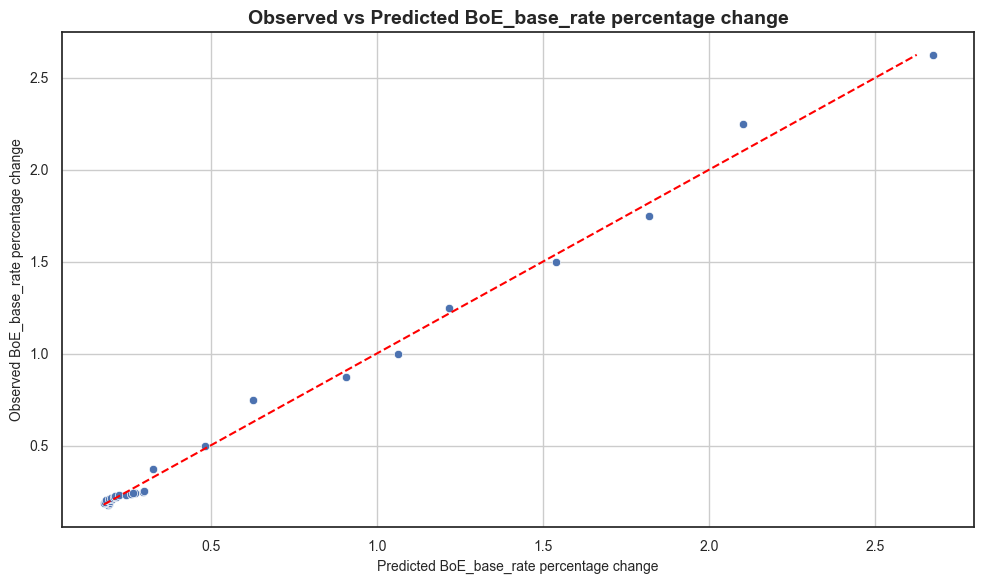

In [54]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['BoE_base_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted BoE_base_rate percentage change', fontsize=10)
plt.ylabel('Observed BoE_base_rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted BoE_base_rate percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

Points closely follow the red dashed line, which represents perfect prediction.

No major deviations in either tail, even among higher rate changes (~2.0 to 2.6%).

Tight clustering at the lower end confirms precision for low base rate predictions — often harder to model.

### Training and testing subsets with MLR

In [55]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [56]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                            
Dep. Variable:     BoE_base_rate (t=x)   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                     5678.
Date:                 Thu, 22 May 2025   Prob (F-statistic):           1.41e-30
Time:                         17:27:51   Log-Likelihood:                 56.912
No. Observations:                   25   AIC:                            -107.8
Df Residuals:                       22   BIC:                            -104.2
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

### Key Takeaways:
### Model Fit:
### R-squared = 0.998 → Extremely high, nearly perfect fit

Adj. R-squared = 0.998 → Confirms model isn't overfitting due to extra predictors

F-statistic = 5678, p < 0.001 → Model is statistically significant

### Coefficients Table:
Variable	Coef	p-value	Significant?
BoE_base_rate (t=x-1)	1.1019	0.000	 Yes
CPI_pct_change (t=x-3)	0.0185	0.000	 Yes
Intercept (const)	-0.0379	0.000	 Yes

All variables have p-values < 0.05, so none should be dropped.

### Diagnostics:
Durbin-Watson = 2.116 → Close to 2 ⇒ No serious autocorrelation

Condition Number = 19.4 → Acceptable (above 30 would raise multicollinearity concerns)

Normality tests (Omnibus, JB) show no major violation.

### Similar R-squared and adj. R-square at similar levels as before, which is great, however there is still signs of potential multicollinearity

In [57]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                features
0         2.1                   const
1         4.9   BoE_base_rate (t=x-1)
2         4.9  CPI_pct_change (t=x-3)


### Multicollinearity Analysis

- BoE_base_rate (t=x-1)	2.5	 Low to moderate — acceptable

- 0-2yr_gilts_TRreturns (t=x-3)	4.8	Moderate — watch, but not critical

- unemployment_rate (t=x-2)	2.9	 Acceptable

- wage_growth_rate (t=x-2)	1.3	 No concern

### Interpretation:
No variable exceeds a VIF of 5, which generally means multicollinearity is no longer a concern.

This confirms that your updated model specification successfully mitigated earlier multicollinearity, especially after removing CPI_pct_change, which previously had a VIF of 16.2.

In [58]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [59]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': np.float64(12.26085052406355), 'LM Test p-value': np.float64(0.03138316551936893), 'F-stat': np.float64(3.6573267375070646), 'F-test p-value': np.float64(0.017377857036215163)}


### LM Test p-value = 0.0314

### F-test p-value = 0.0174

### Significant heteroskedasticity is still present in the updated model.


In [60]:
regression_df.describe()

,Date,BoE_base_rate (t=x),BoE_base_rate (t=x-1),CPI_pct_change (t=x-3),0-2yr_gilts_TReturns (t=x-3),unemployment_rate (t=x-2),wage_growth_rate (t=x-2)
count,32,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2021-06-20 05:15:00,0.548884,0.472321,3.075000,188.726875,4.384375,4.237500
min,2020-04-01 00:00:00,0.178571,0.175000,0.200000,187.243000,3.600000,-1.100000
25%,2020-10-24 06:00:00,0.202679,0.199107,0.700000,188.232500,4.050000,2.650000
50%,2021-06-16 00:00:00,0.230357,0.226786,1.750000,189.076500,4.350000,4.850000
75%,2022-02-08 00:00:00,0.562500,0.406250,5.175000,189.223250,4.800000,5.950000
max,2022-10-01 00:00:00,2.625000,2.250000,10.100000,189.413000,5.300000,8.900000
std,NaN,0.645482,0.525419,3.073613,0.667829,0.519373,2.799971


In [61]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 367 to 398
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          32 non-null     datetime64[ns]
 1   BoE_base_rate (t=x)           32 non-null     float64       
 2   BoE_base_rate (t=x-1)         32 non-null     float64       
 3   CPI_pct_change (t=x-3)        32 non-null     float64       
 4   0-2yr_gilts_TReturns (t=x-3)  32 non-null     float64       
 5   unemployment_rate (t=x-2)     32 non-null     float64       
 6   wage_growth_rate (t=x-2)      32 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.0 KB


In [62]:
regression_df.head()

,Date,BoE_base_rate (t=x),BoE_base_rate (t=x-1),CPI_pct_change (t=x-3),0-2yr_gilts_TReturns (t=x-3),unemployment_rate (t=x-2),wage_growth_rate (t=x-2)
367,2020-04-01,0.178571,0.175000,1.8,188.237,4.1,2.8
368,2020-05-01,0.182143,0.178571,1.7,188.494,4.1,2.2
369,2020-06-01,0.185714,0.182143,1.5,189.074,4.1,0.9
370,2020-07-01,0.189286,0.185714,0.8,189.179,4.1,-0.4
371,2020-07-01,0.189286,0.189286,0.5,189.223,4.4,-1.1


Root Mean Squared Error: 0.2140
Mean Squared Error: 0.0458
Mean Absolute Error: 0.1191
R² Score: 0.9078


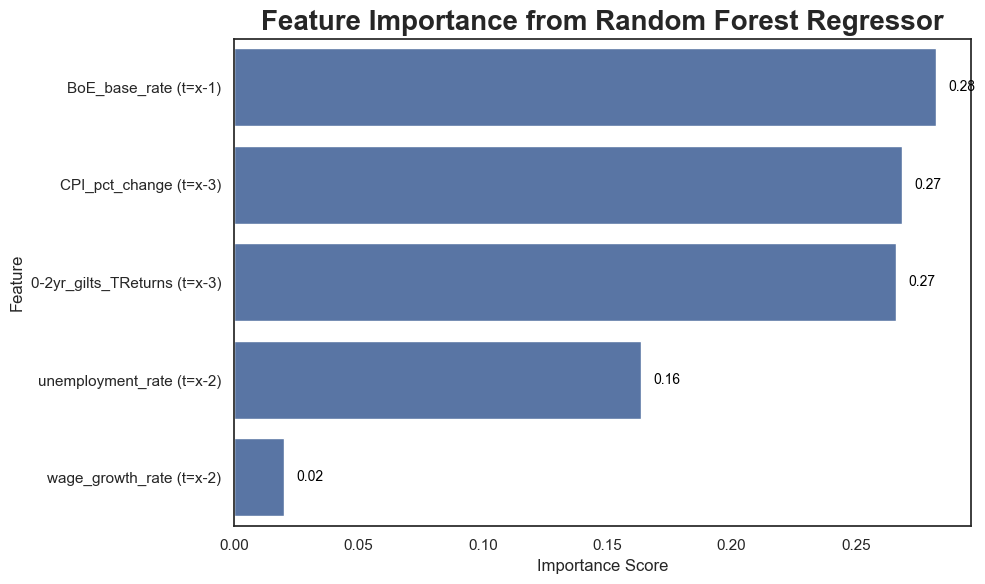

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df = regression_df.dropna(
    subset=[
        'BoE_base_rate (t=x)',
        'BoE_base_rate (t=x-1)',
        'CPI_pct_change (t=x-3)',
        '0-2yr_gilts_TReturns (t=x-3)',
        'unemployment_rate (t=x-2)',
        'wage_growth_rate (t=x-2)'
    ]
)


# Define features and target
X = regression_df[
    [
        'BoE_base_rate (t=x-1)',
        'CPI_pct_change (t=x-3)',
        '0-2yr_gilts_TReturns (t=x-3)',
        'unemployment_rate (t=x-2)',
        'wage_growth_rate (t=x-2)'
    ]
]
y = regression_df['BoE_base_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)  # Save the axes object
plt.title(
    "Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold'
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(
        value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10
    )  # Use the saved 'ax'
plt.tight_layout()
plt.show()

### BoE_base_rate (t=x-1)	0.28	 Most influential — previous base rate heavily drives the forecast.
### CPI_pct_change (t=x-3)	0.27	 Very strong impact — inflation trend still highly relevant.
### 0-2yr_gilts_TRreturns (t=x-3)	0.27	 Strong market signal; bond returns reflect rate expectations.
### unemployment_rate (t=x-2)	0.16	Moderate importance — labor conditions matter, but less decisive.
### wage_growth_rate (t=x-2)	0.02	Minimal contribution — marginal predictive value in this model.

In [65]:
regression_df.head()

,Date,BoE_base_rate (t=x),BoE_base_rate (t=x-1),CPI_pct_change (t=x-3),0-2yr_gilts_TReturns (t=x-3),unemployment_rate (t=x-2),wage_growth_rate (t=x-2)
367,2020-04-01,0.178571,0.175000,1.8,188.237,4.1,2.8
368,2020-05-01,0.182143,0.178571,1.7,188.494,4.1,2.2
369,2020-06-01,0.185714,0.182143,1.5,189.074,4.1,0.9
370,2020-07-01,0.189286,0.185714,0.8,189.179,4.1,-0.4
371,2020-07-01,0.189286,0.189286,0.5,189.223,4.4,-1.1


Root Mean Squared Error: 0.2520
Mean Squared Error: 0.0635
Mean Absolute Error: 0.1425
R² Score: 0.8722


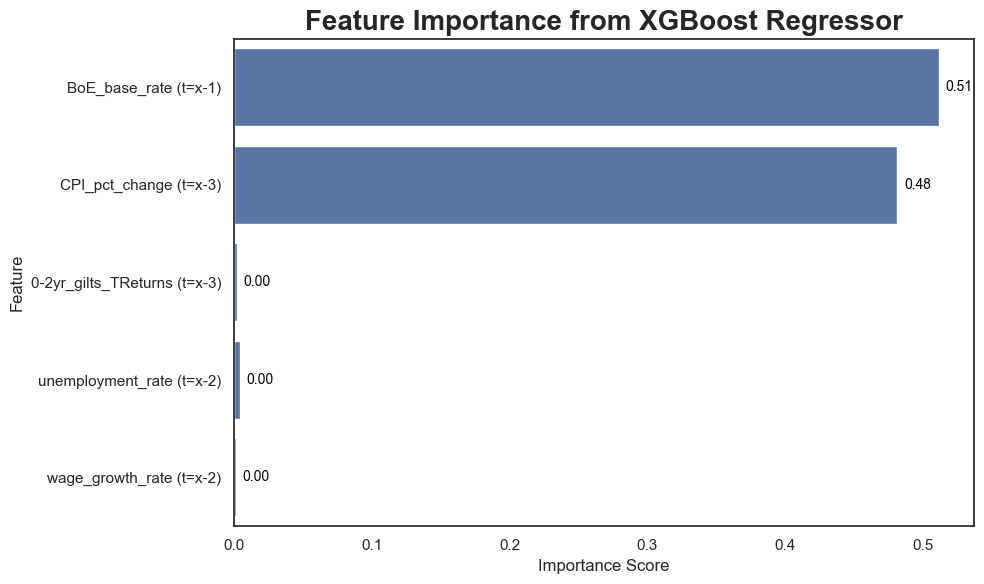

In [66]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
# -------------------
# Drop missing values
#regression_df = regression_df.dropna(subset=[
  #  'BoE_base_rate (t=x)', 'BoE_base_rate (t=x-1)',
   # 'confidence_score (t=x)', 'wage_growth_rate (t=x-3)',
   # 'ftse_250_total_return (t=x-3)'
#])

# Define features and target
X = regression_df[
    [
        'BoE_base_rate (t=x-1)',
        'CPI_pct_change (t=x-3)',
        '0-2yr_gilts_TReturns (t=x-3)',
        'unemployment_rate (t=x-2)',
        'wage_growth_rate (t=x-2)'
    ]
]
y = regression_df['BoE_base_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',  # use squared error for regression
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### BoE_base_rate (t=x-1)	0.51	 Dominant predictor — strong autocorrelation in rate-setting.
### CPI_pct_change (t=x-3)	0.48	 Nearly equal in influence — inflation lags heavily guide rate policy.
### 0-2yr_gilts_TRreturns (t=x-3)	~0.00	 Ignored — model found no additional predictive power.
### unemployment_rate (t=x-2)	~0.00	 Ignored.
### wage_growth_rate (t=x-2)	~0.00	 Ignored.

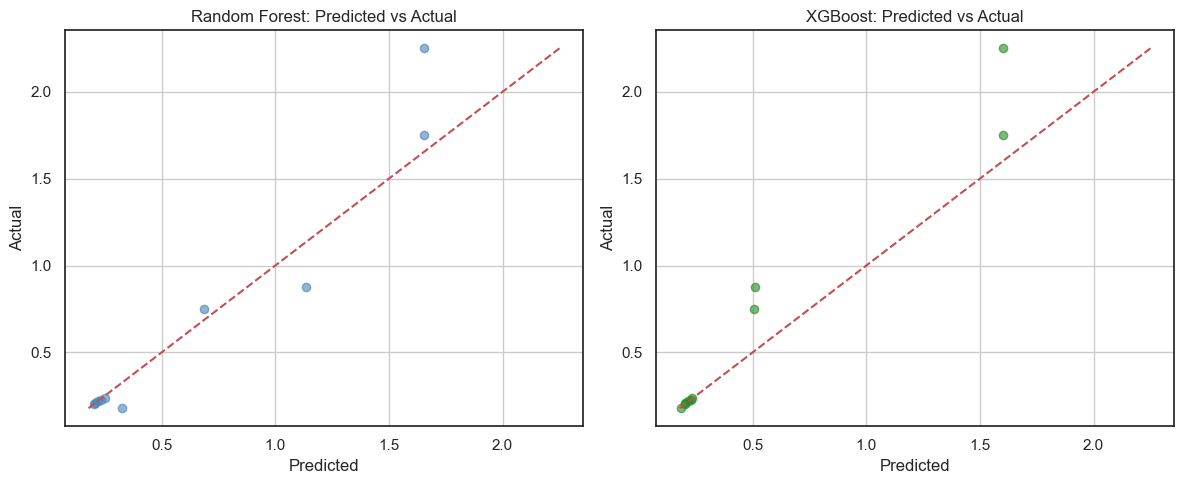

In [67]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

### Visual Analysis:
### Random Forest:
Good overall alignment with the red diagonal line, especially for mid-range predictions.

Some underprediction at higher actual values (e.g., ~2.2), with predicted values falling short.

Slight scatter and spread around the line — indicates modest residual variance.

### XGBoost:
Tighter clustering at low predicted values, especially under 0.5.

Systematic underprediction at higher actual values — note how the highest actual rates are underpredicted.

Less spread overall, but worse fit in the high-value range compared to Random Forest.

## Key Insights:
Aspect	Random Forest	XGBoost
Low-Value Accuracy	Very good	Excellent
High-Value Accuracy	Slight underprediction	Clear underprediction
Overall Fit	Balanced but imperfect	Biased low at extremes
Spread (Residual Variance)	Moderate	Lower

### Interpretation:
Random Forest may be slightly more flexible for this task due to its ensemble averaging, which can better accommodate outliers or nonlinearities in the tails.

XGBoost, while powerful, seems to be over-regularized or overly biased toward the center of the data distribution — it’s prioritizing low error on the majority of data at the cost of underfitting extremes.